In [1]:
import pandas as pd
import numpy as np

### Import the Data

In [2]:
df1=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Drop some features which are not much more affect the model

In [4]:
df2=df1.drop(['area_type','availability','society','balcony'],axis=1)

In [5]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Find the number of null value present in the data

In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

### As we see that very less amount of data are null, so i am going to drop the null value

In [7]:
df3=df2.dropna()

In [8]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### As we can see that the unique value of size are different, so i have to convert these data, which are understandable by our machile learning Algorithm

In [11]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

<ipython-input-11-164e2bb702c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [12]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3.bhk.dtypes

dtype('int64')

In [14]:
df4=df3.drop('size',axis=1)

In [15]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [16]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### Write this below programm to find out the unusual data present in total_sqft column

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df4[~df4['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


### Let's consider the data which are in range, converted into average of both the number

In [19]:
def cng_to_num(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None
    return True

In [20]:
df4['sqft']=df4['total_sqft'].apply(cng_to_num)

In [21]:
df4 = df4[df4.sqft.notnull()]

In [22]:
df4.head()

,location,total_sqft,bath,price,bhk,sqft
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0
2,Uttarahalli,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0
4,Kothanur,1200,2.0,51.00,2,1200.0


In [23]:
df5=df4.drop('total_sqft',axis=1)

In [24]:
df5.head()

,location,bath,price,bhk,sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Uttarahalli,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Kothanur,2.0,51.00,2,1200.0


In [25]:
df5.shape

(13200, 5)

In [26]:
df5.isnull().sum()

location    0
bath        0
price       0
bhk         0
sqft        0
dtype: int64

### Doing some Feature Engineering to find out the outlier present in the data.
### Here i add a special feature call price_per_sqft

In [27]:
df5['price_per_sqft']=(df5['price']*100000)/df5['sqft']
df5.head(2)

,location,bath,price,bhk,sqft,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615


### A lots of house data which location are less then 10, i consider those as other. And i just doing the Dimensionality reduction

In [28]:
df5['location']=df5.location.apply(lambda x:x.strip())

In [29]:
df5.location.value_counts()

Whitefield           533
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       264
Thanisandra          235
                    ... 
Park View Layout       1
kadubisnahalli         1
Maheswari Nagar        1
Malur Hosur Road       1
Kumbhena Agrahara      1
Name: location, Length: 1287, dtype: int64

In [30]:
location_stats=df5.location.value_counts()

In [31]:
len(location_stats)

1287

In [32]:
len(location_stats[location_stats<=10])

1047

In [33]:
len(location_stats[location_stats>10])

240

In [34]:
location_stats_lessthen_10=location_stats[location_stats<=10]

In [35]:
location_stats_lessthen_10.head(2)

Dodsworth Layout         10
1st Block Koramangala    10
Name: location, dtype: int64

In [36]:
df5['location']=df5['location'].apply(lambda x: 'other' if x in location_stats_lessthen_10 else x)

In [37]:
df5.head(2)

,location,bath,price,bhk,sqft,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615


In [38]:
df5['location'].value_counts()

other                        2872
Whitefield                    533
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                264
                             ... 
Tindlu                         11
Pattandur Agrahara             11
Bommenahalli                   11
2nd Phase Judicial Layout      11
HAL 2nd Stage                  11
Name: location, Length: 241, dtype: int64

In [39]:
df5[df5['location']=='other'].head(4)

,location,bath,price,bhk,sqft,price_per_sqft
9,other,6.0,370.0,6,1020.0,36274.509804
18,other,4.0,290.0,3,2770.0,10469.314079
19,other,2.0,48.0,2,1100.0,4363.636364
25,other,3.0,56.0,3,1250.0,4480.000000


## Outlier Removal using Business logic
I consider normally squqre feet per BHK is 300,
lessthen that i consider as Outlier

In [40]:
df5[df5['sqft']/df5['bhk']<300].head(4)

,location,bath,price,bhk,sqft,price_per_sqft
9,other,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,7.0,85.0,8,1350.0,6296.296296


In [41]:
df6=df5[~(df5['sqft']/df5['bhk']<300)]

In [42]:
df6.shape

(12456, 6)

In [43]:
df6['price_per_sqft'].max()

176470.58823529413

In [44]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

### Outlier removal using Standard deviation and Mean

In [45]:
lower_limit=df6['price_per_sqft'].mean()-df6['price_per_sqft'].std()
lower_limit

2140.375487540642

In [46]:
upper_limit=df6['price_per_sqft'].mean()+df6['price_per_sqft'].std()

In [47]:
upper_limit

10476.630164555336

In [48]:
df6_outlier=df6[(df6['price_per_sqft']<lower_limit) | (df6['price_per_sqft']>upper_limit)]

In [49]:
df6_outlier

,location,bath,price,bhk,sqft,price_per_sqft
7,Rajaji Nagar,4.0,600.0,4,3300.0,18181.818182
11,Whitefield,5.0,295.0,4,2785.0,10592.459605
22,Thanisandra,5.0,380.0,4,2800.0,13571.428571
48,KR Puram,1.0,130.0,2,800.0,16250.000000
57,other,2.0,185.0,2,1500.0,12333.333333
...,...,...,...,...,...,...
13290,Sarjapur Road,2.0,450.0,4,4050.0,11111.111111
13296,Cox Town,2.0,140.0,2,1200.0,11666.666667
13305,Hulimavu,1.0,220.0,1,500.0,44000.000000
13306,other,5.0,325.0,4,1200.0,27083.333333


In [50]:
df7=df6[~((df6['price_per_sqft']<lower_limit) | (df6['price_per_sqft']>upper_limit))]

In [51]:
df7.shape[0]

11294

In [52]:
df6_outlier.shape[0]

1162

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

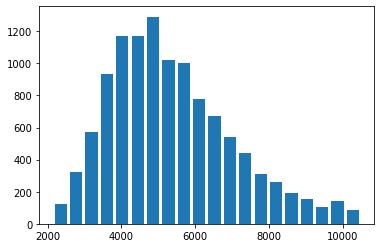

In [54]:
plt.hist(df7.price_per_sqft,rwidth=0.8,bins=20)
plt.show()

In [55]:
df7.head(3)

,location,bath,price,bhk,sqft,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556


In [56]:
df8=df7.drop('price_per_sqft',axis=1)

In [57]:
df8.head(2)

,location,bath,price,bhk,sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0


### One Hot Encoading for location

In [58]:
df8_dummies=pd.get_dummies(df8.location)

In [59]:
df8_dummies.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df9=pd.concat([df8,df8_dummies.drop('other',axis=1)],axis=1)

In [61]:
df9.head(2)

,location,bath,price,bhk,sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,2.0,39.07,2,1056.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,5.0,120.00,4,2600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df10=df9.drop('location',axis=1)

In [63]:
df10.head(2)

,bath,price,bhk,sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,39.07,2,1056.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,120.00,4,2600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Separate the data by feature and label

In [64]:
x=df10.drop('price',axis=1)
y=df10.price

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

### Build a model using Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model=LinearRegression()

In [69]:
model.fit(x_train,y_train)

LinearRegression()

In [70]:
model.score(x_test,y_test)

0.8539960772755766

In [71]:
df10.head(2)

,bath,price,bhk,sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,39.07,2,1056.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,120.00,4,2600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Test the model for any Properties

In [72]:
def predict_price(location,bath,bhk,sqft):
    loc_index=np.where(x.columns==location)[0][0]
    s=np.zeros(len(x.columns))
    s[0]=bath
    s[1]=bhk
    s[2]=sqft
    if loc_index>=0:
        s[loc_index]=1
    return model.predict([s])[0]

In [73]:
predict_price('2nd Phase Judicial Layout',2,2,1150)

48.313195021916826

In [74]:
predict_price('Whitefield',2,3,2100)

120.89375974660224

In [75]:
predict_price('Vijayanagar',1,1,950)

61.24958979339712